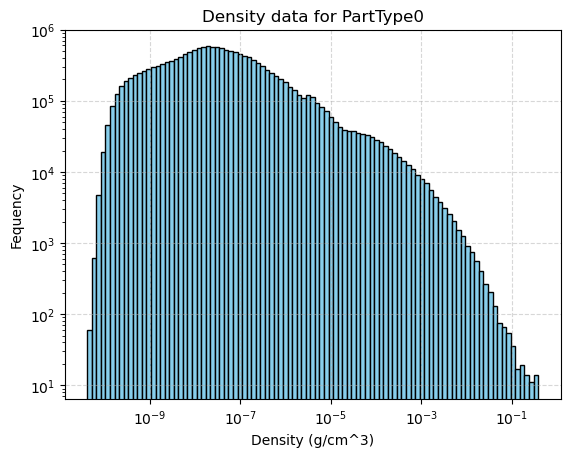

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy 
from astropy import units as u
from astropy import constants as const

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file,"r")
data.keys()

gass_data = data["PartType0"] 
gass_data.keys()

h= 0.06711 #km/sec/mc       Hubble constant/1000

density_data = data["PartType0/Density"][:] * (1e10 * (u.Msun / h) / (u.kpc / h) ** 3)
g_cm3 = density_data.to("g/cm3").value/(1.67262192 * 1e-24)

plt.hist(g_cm3,color='skyblue', edgecolor='black', bins = np.geomspace(g_cm3.min(),g_cm3.max(), 100))
plt.xlabel('Density (g/cm^3)')
plt.ylabel('Fequency')
plt.title('Density data for PartType0')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xscale("log")
plt.yscale("log")

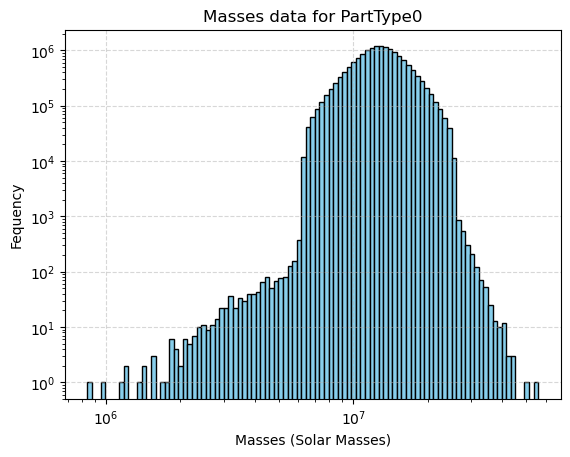

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy 
from astropy import units as u
from astropy import constants as const

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file,"r")
data.keys()

gass_data = data["PartType0"] 
gass_data.keys()

masses_data = gass_data["Masses"][:]

h= 0.06711 #km/sec/mc Hubble constant/1000
masses_data = data["PartType0/Masses"][:] * (1e10) * h
#kg = masses_data.to("kg").value
#kg = kg[np.isfinite(kg) & (kg > 0)]

plt.hist(masses_data,color='skyblue', edgecolor='black', bins = np.geomspace(masses_data.min(),masses_data.max(), 100))
plt.xlabel('Masses (Solar Masses)')
plt.ylabel('Fequency')
plt.title('Masses data for PartType0')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xscale("log")
plt.yscale("log")

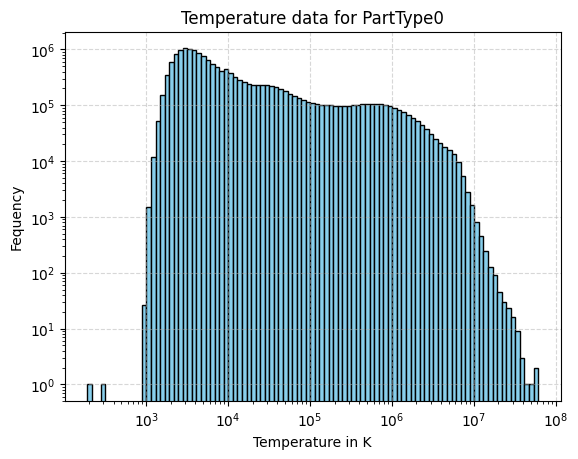

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file,"r")

BOLTZMANN  = 1.38065e-16         #erg/K - NIST 2010
PROTONMASS = 1.67262178e-24      #gram  - NIST 2010

def temperature(file):

    # read internal energy, electron abundance  and star-formation rate
    f      = h5py.File(file , 'r')
    ne     = f['/PartType0/ElectronAbundance'][:]
    energy = f['/PartType0/InternalEnergy'][:] #(km/s)^2
    f.close()

    # compute the temperature
    yhelium = 0.0789
    T = energy*(1.0 + 4.0*yhelium)/(1.0 + yhelium + ne)*1e10*(2.0/3.0)
    T *= (PROTONMASS/BOLTZMANN)
    return T

temp_data = temperature(file)

plt.hist(temp_data,color='skyblue', edgecolor='black', bins = np.geomspace(temp_data.min(),temp_data.max(), 100))
plt.xlabel('Temperature in K')
plt.ylabel('Fequency')
plt.title('Temperature data for PartType0')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xscale("log")
plt.yscale("log")

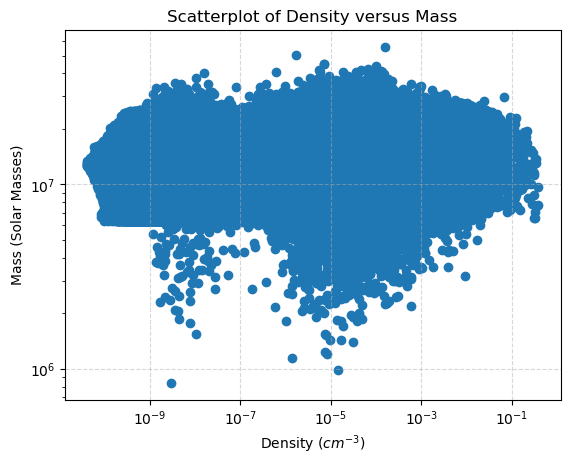

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy 
from astropy import units as u
from astropy import constants as const
h= 0.06711 #km/sec/mc Hubble constant/1000

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file, "r")

gass_data = data["PartType0"] 

density_data = gass_data["Density"][:]
density_data = data["PartType0/Density"][:] * (1e10 * (u.Msun / h) / (u.kpc / h) ** 3)
g_cm3 = density_data.to("g/cm3").value/(1.67262192 * 1e-24) # (g / cm^3) / (hydrogen_mass_fraction * m_hydrogen)

masses_data = gass_data["Masses"][:]
masses_data = data["PartType0/Masses"][:] * (1e10) * h
#kg = masses_data.to("kg").value

plt.scatter(g_cm3, masses_data)
plt.xlabel('Density ($cm^{-3}$)')
plt.ylabel('Mass (Solar Masses)')
plt.title('Scatterplot of Density versus Mass')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xscale("log")
plt.yscale("log")

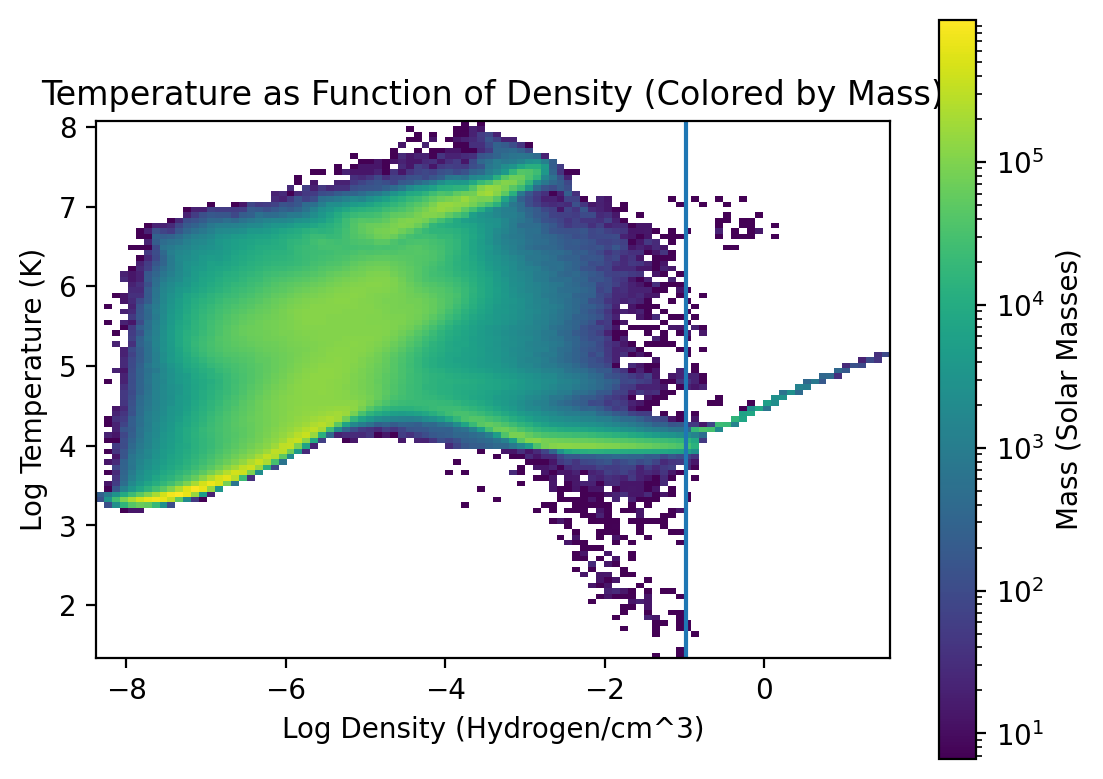

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy 
from astropy import units as u
from astropy import constants as const
from matplotlib.colors import LogNorm
h= 0.6711 #km/sec/mc Hubble constant/1000

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file,"r")

gass_data = data["PartType0"] 
gass_data.keys()

density_data = gass_data["Density"][:]
density_data = data["PartType0/Density"][:] * (1e10 * (u.Msun / h) / (u.kpc / h) ** 3)
g_cm3 = density_data.to("g/cm3").value/(1.67262192 * 1e-24)

masses_data = gass_data["Masses"][:]
solar_masses = masses_data * 1e10 * h

BOLTZMANN  = 1.38065e-16         #erg/K - NIST 2010
PROTONMASS = 1.67262178e-24      #gram  - NIST 2010

def temperature(file):

    # read internal energy, electron abundance  and star-formation rate
    f      = h5py.File(file , 'r')
    ne     = f['/PartType0/ElectronAbundance'][:]
    energy = f['/PartType0/InternalEnergy'][:] #(km/s)^2
    f.close()

    # compute the temperature
    yhelium = 0.0789
    T = energy*(1.0 + 4.0*yhelium)/(1.0 + yhelium + ne)*1e10*(2.0/3.0)
    T *= (PROTONMASS/BOLTZMANN)
    return T

temp_data = temperature(file)

count_perbin, _ ,_ = np.histogram2d(
np.log10(g_cm3),
np.log10(temp_data),
bins=100,
weights=np.log10(solar_masses),
range=[[np.log10(g_cm3).min(), np.log10(g_cm3).max()], [np.log10(temp_data).min(), np.log10(temp_data).max()]],
)
plt.figure(
    dpi=200
)

image = plt.imshow(
            count_perbin.T,

            origin="lower",
            extent=[np.log10(g_cm3).min(), np.log10(g_cm3).max(),np.log10(temp_data).min(),np.log10(temp_data).max()],
            norm=LogNorm(), # min,max
        ) 

plt.axvline(np.log10(0.105))
plt.ylabel('Log Temperature (K)')
plt.xlabel('Log Density (Hydrogen/cm^3)')
plt.title('Temperature as Function of Density (Colored by Mass)')
plt.colorbar(image, label = "Mass (Solar Masses)") 

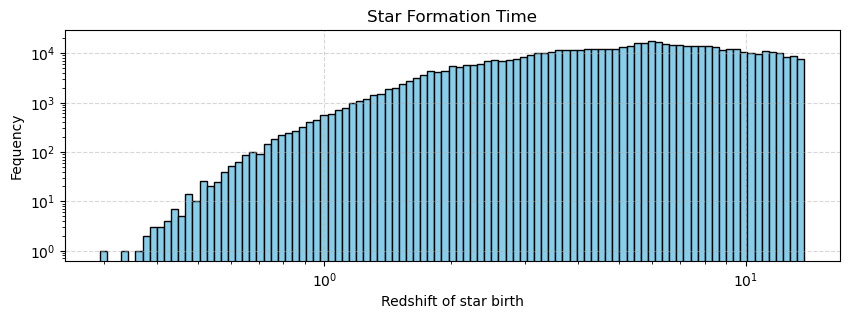

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy 
from astropy import units as u
from astropy import constants as const
from astropy.cosmology import Planck15

file = "/Users/itamargoshen/Desktop/snapshot_090.hdf5" 
data = h5py.File(file,"r")
data.keys()

star_particles_and_wind_data = data["PartType4"] 

StarAndWindFormationTime = star_particles_and_wind_data["GFM_StellarFormationTime"][:]
StarAndWindFormationTime = list(StarAndWindFormationTime)
StarFormationTime = [value for value in StarAndWindFormationTime if value >= 0]
StarFormationTime = np.array(StarFormationTime)

z = []
z = (1 - StarFormationTime)/ StarFormationTime
z = [value for value in z if value > 0]

 
Redshift_when_star_born = Planck15.age(z).value

plt.figure(figsize = (10,3))
plt.hist(Redshift_when_star_born,color='skyblue', edgecolor='black', bins = np.geomspace(Redshift_when_star_born.min(),Redshift_when_star_born.max(), 100))
plt.xlabel('Redshift of Star Birth')
plt.ylabel('Fequency')
plt.title('Redshift of Star Birth')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xscale("log")
plt.yscale("log")